Titanic Last Project for Summer Internship

Author : @YUSUF_CIZLAŞMAK


In [50]:
import imp
import numpy as np
import pandas as pd

import plotly.express as px  ###detaylı bilgi için https://plotly.com/python/line-and-scatter/ ziyaret edebilirsiniz.

from Yardım.MyEDA import *

### Titanic veriseti ve Keşfi

Verinin çekilmesi 

In [51]:
data=pd.read_csv("titanic.csv",encoding="utf-8")

data.head()


#hedef target'ımız SURVIVED OLACAKTIR. BU DA Binary(0-1) şeklinden olduğundan bizi classification problemlerine götürecektir.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
dataBilgiler(data) #data.shape ve data.describe hakkında bilgilerimiz.

verimiz 891 satırdan ve 12 sutundan oluşur.

Datamız kolonları hakkında bilgiler 
 :        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.32920

Unique değerleri yazdırma 

In [53]:
uniqueValues(data)


Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64


Null değerlerinin bulunması

In [54]:
null_function(data=data)


#Boş değerlerin tüm oranlara oranında görüldüğü üzere Cabin oldukça fazla 


"""
Cabin  0.771044 == %77 'si boş demektir. oldukça fazla ve kendimiz doldurursak şayet veriyi sıkıntıya sokacaktır. O yüzden çıkarmak zorunda kalacağız.

0.198653 Yaşı içinse Aykırı veri analizi yapıp değerleri aldıktan sonra doldurmayı düşünüyorum. 

Embarked  ise 2 boş değerlerimiz var. Bu rastgele doldururum ikisine S eklicem.

"""

boş değerler:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
boş değerlerin tüm değerlere oranı : 
 PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64  


"\nCabin  0.771044 == %77 'si boş demektir. oldukça fazla ve kendimiz doldurursak şayet veriyi sıkıntıya sokacaktır. O yüzden çıkarmak zorunda kalacağız.\n\n0.198653 Yaşı içinse Aykırı veri analizi yapıp değerleri aldıktan sonra doldurmayı düşünüyorum. \n\nEmbarked  ise 2 boş değerlerimiz var. Bu rastgele doldururum ikisine S eklicem.\n\n"

###  VERİYİ GÖRSELLEŞTİRME İŞLEMLERİ 

<Figure size 1080x360 with 0 Axes>

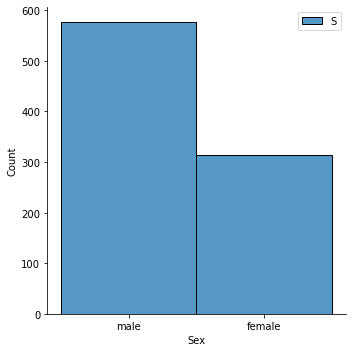

Sex
male      577
female    314
dtype: int64


In [55]:
show_displot(data,"Sex") # görüldüğü üzere kadın ile erkek arasında bir ilginç değer var.

In [56]:
pieChart(data,"Pclass") #detaylı bilgi için help(pieChart) fonksiyonun kullanabilirsiniz

# help(pieChart)


""" Aşağıdaki grafikte de görüldüğü üzere en çok PClass sınıfı 3 numaradadır. Ardından sınıf 2 ve sonra da 1 gelir.

Ve  """

' Aşağıdaki grafikte de görüldüğü üzere en çok PClass sınıfı 3 numaradadır. Ardından sınıf 2 ve sonra da 1 gelir.\n\nVe  '

In [57]:
scatterPlot(data,"Pclass","Fare","Sex") #data, ikinci parametre x sutunundaki feature, sonraki de y sutunundaki feature.



#Aşağıdaki gördüğünüz outputta Pclass -Pclass ile Fare ile arasında ilişkisinde cinsiyetlerle karşılaştırmasını gördük. 

""" 
1. ve 3. sınıf için en çok parayı kadınlar vermiştir.

Tüm sınıflar için en az parayı erkekler vermiştir.

En çok para dağılımı 0 ila 100 arasındadır.

Tabloda bazı 1. sınıfta aykırı değerler görülmektedir.

2. ve 3. sınıfın en yüksek fiyat arasında sadece 4 birimlik fark vardır.
"""

' \n1. ve 3. sınıf için en çok parayı kadınlar vermiştir.\n\nTüm sınıflar için en az parayı erkekler vermiştir.\n\nEn çok para dağılımı 0 ila 100 arasındadır.\n\nTabloda bazı 1. sınıfta aykırı değerler görülmektedir.\n\n2. ve 3. sınıfın en yüksek fiyat arasında sadece 4 birimlik fark vardır.\n'

c:\Users\yusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



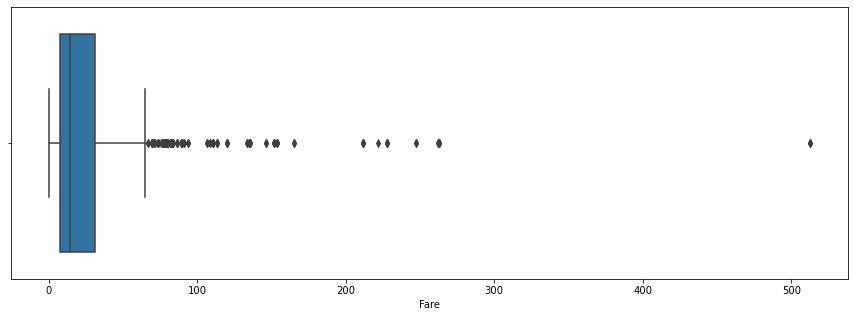

c:\Users\yusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



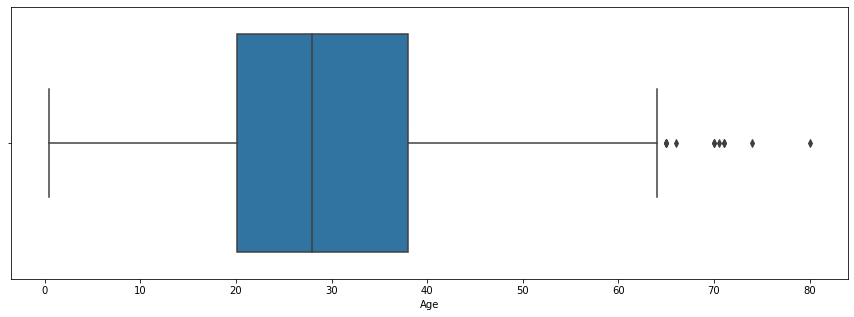

"\nFare (ücret) de görüldüğü üzere 0'a çok yakın bir yerde oldukça çok para dağılımı 0 ila 100 arasında\nama sağ tarafta olduğu için eğik negatif ve medyanı 100 arasında ve aykırı değerlerimiz 200 sonrası için bakabiliriz.\n\n\nAge(yaş) ise aykırı değerlerimiz oldukça az ve normal bir dağılıma sahip modumuz 30 kusuratlı yaşlar olabilir. 65'ten sonrası \nbizim için aykırı değer. Ancak unutmamamız gerekiyor ki yaş değerlerimizin %20'si boş. Ancak verilerimiz oldukça iyi dağıldığı için ortalama ile doldurulabilir.\n\n\n\n"

In [58]:
sutunlarimiz=["Fare","Age"]


for i in sutunlarimiz:
    boxPlot(data,i)



"""
Fare (ücret) de görüldüğü üzere 0'a çok yakın bir yerde oldukça çok para dağılımı 0 ila 100 arasında
ama sağ tarafta olduğu için eğik negatif ve medyanı 100 arasında ve aykırı değerlerimiz 200 sonrası için bakabiliriz.


Age(yaş) ise aykırı değerlerimiz oldukça az ve normal bir dağılıma sahip modumuz 30 kusuratlı yaşlar olabilir. 65'ten sonrası 
bizim için aykırı değer. Ancak unutmamamız gerekiyor ki yaş değerlerimizin %20'si boş. Ancak verilerimiz oldukça iyi dağıldığı için ortalama ile doldurulabilir.



"""

Bazı sutunların bazı sutunlarla ilişkilerine bakalım.

c:\Users\yusuf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\yusuf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\yusuf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\yusuf\anaconda3\lib\site-pac

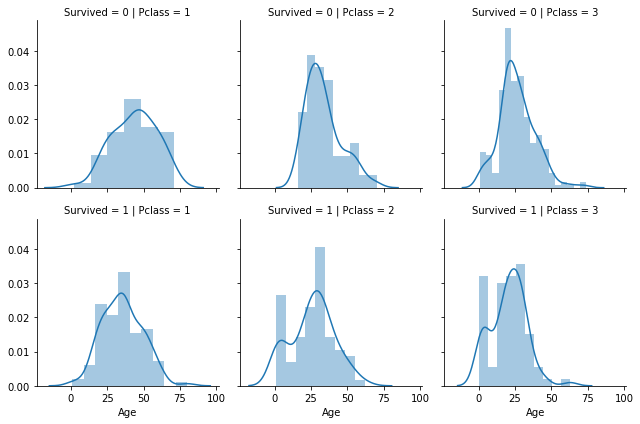

In [59]:
g=sns.FacetGrid(data,row="Survived",col="Pclass") 
g.map(sns.distplot,"Age") #yukarıdan sonra hangisiyle birlikte göstermek istiyorsan onu yazıyoruz.

Yukarıdaki grafikte:
Yaşayanlar arasında Survived =1 arasında, yaşayanların çoğu 25 yaşını geçmiş kişiler olurken 

Ölenler arasında yani Survived=0 arasında, PClass2 ve Pclass 3 ölenlerin çoğu 25 ve 25 küçük kişiler çoğunluğu oluşturuyor.

0 ila 1'lerden kaç tane var olduğuna bakma

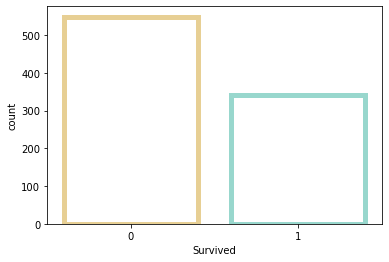

Survived
0    549
1    342
dtype: int64


In [60]:
CountPlot(data,"Survived")



#Target değişkenimde fark oldukça görülüyor. 
#Bu başarımı etkileyebilecek bir durum, belki de overfitting durumu var.

In [61]:
YasCinsiyetBiniseFiyatOrtalaması(data,"Embarked","Sex","Age","mean")


#BU VERİ İÇİN : Binis="Embarked" yazılmalı Cinsiyet="Sex" yazılmalı Yas="Age" yazılmalı method="mean","max","min","75%" şeklinde ifadeler yazılabili

                          Fare
Embarked Sex    Age           
C        female 0.75   19.2583
                1.00   15.7417
                3.00   41.5792
                4.00   13.4167
                5.00   19.2583
...                        ...
S        male   65.00  26.5500
                66.00  10.5000
                70.00  40.7500
                74.00   7.7750
                80.00  30.0000

[236 rows x 1 columns]


### Titanic Veriseti Temizleme ve DOLDURMA 

In [62]:
null_function(data=data)


#Boş değerlerin tüm oranlara oranında görüldüğü üzere Cabin oldukça fazla 

boş değerler:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
boş değerlerin tüm değerlere oranı : 
 PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64  


Embarked  ise 2 boş değerlerimiz var. Bu rastgele doldururum ikisine S eklicem.

In [63]:
values={"Embarked":"S"} #değerlerimi buradan belirliyorum.

data.fillna(value=values,inplace=True) #inplace kalıcı olmasını sağlar


data.info() # kontrol işlemi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin  0.771044 == %77 'si boş demektir. oldukça fazla ve kendimiz doldurursak şayet veriyi sıkıntıya sokacaktır. O yüzden çıkarmak zorunda kalacağız.

In [64]:
out_feature(data,"Cabin") # LÜTFEN 1'E BASINIZ # SUTUN OLARAK KALDIRACAKTIR.


# gördüğünüz ise artık Cabin sutunu yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


YAŞ İÇİN AYKIRI DEĞER ANALİZİ VE %20'lik kısmını MEDYAN ile doldurma işlemi 

Age için boxplot çizdirme

In [65]:
data["Age"].describe

<bound method NDFrame.describe of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

c:\Users\yusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



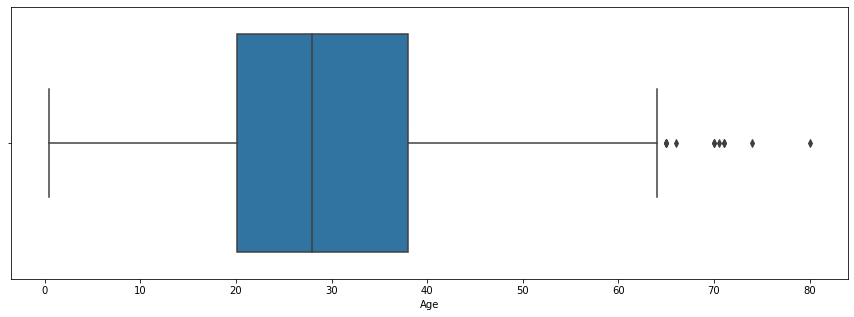

In [66]:
boxPlot(data,"Age")

In [67]:
AgeNaDoldurma(data,"Age","median") #medyan ile tercih ettik


"""
Çünkü diğer kullandığımız methodlar veriyi eğik negatif ve eğik pozitif şeklinde hale sokuyordu ve aynı aykırı değer aralıklarındaydı

Bundan dolayı median'ı tercih ettik.


bunu kodun yanında gönderdiğim sunuda da atacağım.

"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


"\nÇünkü diğer kullandığımız methodlar veriyi eğik negatif ve eğik pozitif şeklinde hale sokuyordu ve aynı aykırı değer aralıklarındaydı\n\nBundan dolayı median'ı tercih ettik.\n\n\nbunu kodun yanında gönderdiğim sunuda da atacağım.\n\n"

In [68]:
AynıDegerleriBulma(data,"Name")
# Tekrarlanan verileri bulmak için kullandığımız fonksiyon verimizin kaçta kaçı gittiği hakkında da bilgi veriyor.


verilerimizin :  100.0 kadarı kaldı


c:\Users\yusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



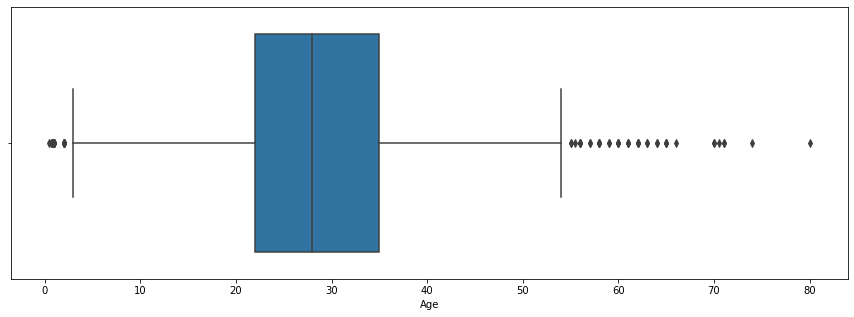

'\nAşağıdada görüldüğü üzere bazı aykırı görülüyor bununla işlemler yapmamız lazım.\n\n'

In [69]:
boxPlot(data,"Age")


"""
Aşağıdada görüldüğü üzere bazı aykırı görülüyor bununla işlemler yapmamız lazım.

"""

##### Yas için Aykırı Değer analizi 





In [70]:
AykırıDegerAnalizi(data,"Age") #3 çeyreklik 83 seçildi çünkü 55-65 kadar kadar sürekli bir verimiz bütünlüğü var. 

##Length de yazdığı gibi 11 adet Aykırı değerlerimiz var. 


#alt sınır 0 ve üst sınırım 64 yaş olarak belirlenmiş.



alt sınırımız yaş için : 2.5
üst sınırımız yaş için : 54.5

 [7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 66, dtype: float64]


In [71]:
AykırıDeğerleriDoldurma(data)



"""AYKIRI DEĞER DOLDURMADA ALT SINIR VE ÜST SINIR BAZ ALINARAK DOLDURMA İŞLEMİ GERÇEKLEŞTİRİLMİŞTİR."""


c:\Users\yusuf\Desktop\GOALS\SUBU_AI_STAJ\MACHINE_LEARNING\BITIRME_PROJESI_YUSUF_CIZLASMAK\Yardım\MyEDA.py:226: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\yusuf\Desktop\GOALS\SUBU_AI_STAJ\MACHINE_LEARNING\BITIRME_PROJESI_YUSUF_CIZLASMAK\Yardım\MyEDA.py:227: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'AYKIRI DEĞER DOLDURMADA ALT SINIR VE ÜST SINIR BAZ ALINARAK DOLDURMA İŞLEMİ GERÇEKLEŞTİRİLMİŞTİR.'

c:\Users\yusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



alt sınırımız yaş için : 2.5
üst sınırımız yaş için : 54.5

 [Series([], Name: Age, dtype: float64)]
None


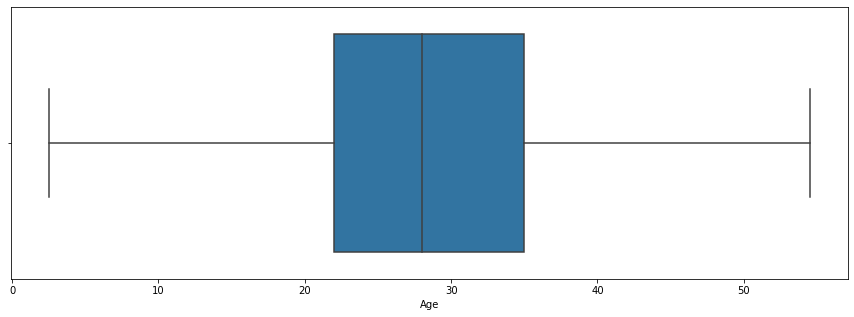

In [72]:
#CHECK İŞLEMİ

print(AykırıDegerAnalizi(data,"Age"))

boxPlot(data,"Age")


YUKARIDAKİ AGE KOLONUNU CHECK İŞLEMİ VE AYKIRI DEĞER OLMADIĞINI GÖSTERMEK İÇİN UYGULANMIŞTIR 

In [73]:
out_feature(data,"PassengerId") # 1 'e basınız

data.head()

# PassengerID bizim modelimiz için gereksiz bir kolon. 

out_feature(data,"Ticket") #1'e basın

#burada ticket'da gereksiz bir kolon bize herhangi bir anlam ifade etmiyor.

#Herhangi bir düzen sıra yok. Farklı farklı sayılardan oluşuyor. TicketID gibi. bu tarz bilgilerin model'e zarar vereceği aşikar.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 no

### Titanic Future Engineering

SIRADA NAME KOLONUMUZLA İLGİLİ BİR İŞLEMİMİZ VAR 
;

In [74]:
group_titles(data) #group titles işlemi Mr,Mrs. Cap, Miss gibi Ordinal değerleri KATEGORİK VERİLERİ DÖNÜŞTÜRME İŞLEMİ

print(data["Title"].unique()) # Title sutununda dönüştürülen kategorik verilerin kategorik değerleri .

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 69.6+ KB
None
[1 3 2 0 4]


SIRADA CİNSİYET KOLONUMUZLA İLGİLİ BİR İŞLEMİMİZ VAR 


In [75]:
""" Burada cinsiyet kolonunu makinenin anlayacağı dile getirmek olacaktır.  Kadınlara 0 ve erkeklere 1 rakamını verip "Survived" kolonu ile corr'larına bakabilir hale gelebileceğiz artık."""

CinsiyetKolonu(data)

DUMMY VARIABLE EKLEME (5 Tane)

In [76]:
#İlk olarak EMBARKED OLANLARI EKLEDİK ondan sonra Pclass için dummy variable eklicez.

def AddDummyVariablesforEmbarked(data):
    """data=data"""
dummies = pd.get_dummies(data.Embarked, prefix="Embarked").iloc[:, 0:] #içerdiği value kadar dummy variable oluşturma işlemi
data=pd.concat([data, dummies], axis=1,) # 1. parametrem data'nın üstüne  dummy variable eklemiş oluyoruz. axis=1 sutun olarak ekler,



def AddDummyVariablesforPclass(data):
    """data=data"""
dummies = pd.get_dummies(data.Pclass, prefix="Pclass").iloc[:, 0:] #içerdiği value kadar dummy variable oluşturma işlemi
data=pd.concat([data, dummies], axis=1) # 1. parametrem data'nın üstüne  dummy variable eklemiş oluyoruz. axis=1 sutun olarak ekler,



AddDummyVariablesforEmbarked(data) #Embarked sutunu ile Dummy variable eklemek
    

AddDummyVariablesforPclass(data) #Pclass sutunu ile Dummy variable eklemek




#Toplamda 6 dummy variable eklenmiştir.

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,3,1,22.0,1,0,7.2500,S,1,0,0,1,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,3,1,0,0,1,0,0
2,1,3,0,26.0,0,0,7.9250,S,2,0,0,1,0,0,1
3,1,1,0,35.0,1,0,53.1000,S,3,0,0,1,1,0,0
4,0,3,1,35.0,0,0,8.0500,S,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,4,0,0,1,0,1,0
887,1,1,0,19.0,0,0,30.0000,S,2,0,0,1,1,0,0
888,0,3,0,28.0,1,2,23.4500,S,2,0,0,1,0,0,1
889,1,1,1,26.0,0,0,30.0000,C,1,1,0,0,1,0,0


Şimdi de Binilen Şehirler olan (Embarked) olan şehirler hakkında işlemimiz var.

In [77]:
EmbarkedtoLabelEncoding(data)


# """"
# Burada binilen şehirleri yukarıdaki değişkenimizle kategorize ediyoruz. 
# Örneğin S=1
# C=2
# Q=3 

# şeklinde. 
# """

Dummy Variable'lardan kurtulma

In [78]:
data_prepared=data.iloc[:,0:9] # DUMMY VARIBABLE'ları almıyoruz
data_prepared.head() # Gösterme işlemi

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,1,1
1,1,1,0,38.0,1,0,71.2833,2,3
2,1,3,0,26.0,0,0,7.9250,1,2
3,1,1,0,35.0,1,0,53.1000,1,3
4,0,3,1,35.0,0,0,8.0500,1,1


Artık TÜM KOLONLARIMIZI MODELİN ANLAYACAĞI (dtype'ı object olmayan) tipe getirdik ve bunların Korelasyonda gösterelim.

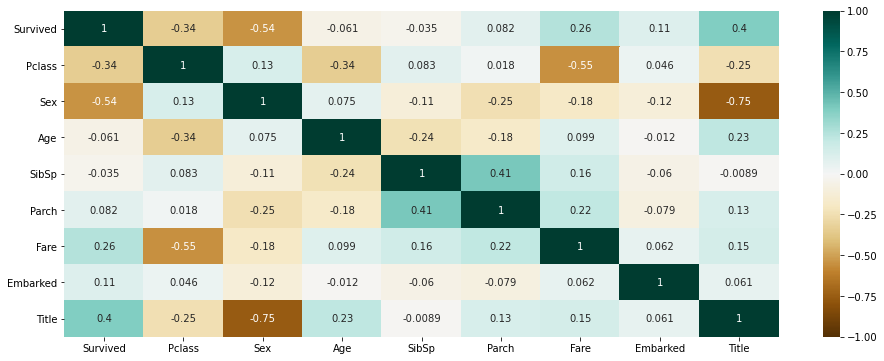

'"\nKorelasyon Analizi:\n\n\nPOSITIVE KORELASYON :\n-İlk dikkat edilmesi gereken nokta Survived ile olan ilişkileri:\n-Title\'ın 0.4 ile positive ilişkisi dikkat çekiyor.\n\n-Diğerleri arasında (Sibling-Sister) veya Parents-Child kolonları arasındaki ilişkisi de dikkat çekiyor. Gemide oldukça çok aile varmış diyebiliriz.\n\n\n\nNEGATIVE KORELASYON:\nİlk dikkat edilmesi gereken nokta Survived ile olan ilişkileri:\n-Cinsiyet kolonunun bir negative korelasyon değeri dikkate alınacak cinstten,\n-Ardından ikinci sıradan Pclass olan ilişkisi geliyor -0.34 ile\n\n-Sex ile Title arasında -0.75 bir negative corr. var ki bu en yüksek değerimiz olabilir.\n-Diğerleri arasında Fare ve Pclass( ödenen para ve oturma sınıfı ) arasında neg. corr oranı oldukça yüksek, ki bu da beklediğimiz bi durum,para arttıkça 1.class\'a geçiyorlar.\n\n\n'

In [79]:
Corr(data_prepared)


""""
Korelasyon Analizi:


POSITIVE KORELASYON :
-İlk dikkat edilmesi gereken nokta Survived ile olan ilişkileri:
-Title'ın 0.4 ile positive ilişkisi dikkat çekiyor.

-Diğerleri arasında (Sibling-Sister) veya Parents-Child kolonları arasındaki ilişkisi de dikkat çekiyor. Gemide oldukça çok aile varmış diyebiliriz.



NEGATIVE KORELASYON:
İlk dikkat edilmesi gereken nokta Survived ile olan ilişkileri:
-Cinsiyet kolonunun bir negative korelasyon değeri dikkate alınacak cinstten,
-Ardından ikinci sıradan Pclass olan ilişkisi geliyor -0.34 ile

-Sex ile Title arasında -0.75 bir negative corr. var ki bu en yüksek değerimiz olabilir.
-Diğerleri arasında Fare ve Pclass( ödenen para ve oturma sınıfı ) arasında neg. corr oranı oldukça yüksek, ki bu da beklediğimiz bi durum,para arttıkça 1.class'a geçiyorlar.


"""

### MODEL OLUŞTURMA -GELİŞTİRME

In [80]:
y=data_prepared.iloc[:,0] #Target kolonumuz
y

x=data_prepared.iloc[:,1:] #diğer Features 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) # Why 42 The Hitchhiker's Guide to the Galaxy

esit_mi=len(x_train)/len(y_train) and len(x_test)/len(y_test) # veriler de bir sorun olup olmama durumu
if esit_mi==1:
    print("Veriler eşit dağıtılmıştır.")
else:
    print("Veriler eşit dağıtılMAmıştır.")



Veriler eşit dağıtılmıştır.


### Normalizasyon İşlemi 

In [81]:

# Normalizasyonun iki temel amacı vardır.
# 
# 
# 
#  Veri tabanında veri tekrarlarını ortadan kaldırmak ve veri tutarlılığını (doğruluğunu) artırmak. 
# Normalizasyon, veri tabanlarına seviyelerle (normal formlar) uygulanır.


x_train,x_test=Normalizasyon(x_train,x_test)

#Target kolonlarımız 0-1'lerden oluştuğu için herhangi bir normalizasyon yapmamıza gerek yok. Sadece Features'lar arasında bir normalizasyon işlemi yapacağız.


İlk kullanacağımız model XGBoost olacak, Fine Tuning yapabilmek içinde GridSearch kullanacağız.

In [82]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from xgboost import XGBClassifier



parameters = {
        'n_estimators': [20,50,100, 200,500],#kaç ayrı kümede inceleyeceği
        'subsample': [0.8, 1.0,1.2,1.4], 
        'gamma' : [0,1,.7,5,7], 
        'learning_rate': [0.01,0.1, 0.3] # 1e-3 oldukça çok kullanılan bir ifade Derin öğrenme'de 1e-3=0.01 anlamına gelir.
        ,"max_depth":[4,5,6,7,8]}# kaç katmanlı



xgboost = XGBClassifier()
xgboost_cv = GridSearchCV(estimator=xgboost, param_grid=parameters, cv = 4, n_jobs = -1, verbose = 0,scoring="accuracy")

"""
GS parametreleri

estimator: sınıflandırma algoritma( neyi optimize etmek istediğimiz)
param_grid: parametreler(p)
scoring: örn: accurary (neye göre skorlanacak)
cv: kaç katlamalı olacak.
n_jobs: aynı anda çalışacak iş 
"""



xgboost_cv.fit(x_train, y_train) # x_train verileriden y_train verileri ÖĞREN işlemi

best_param = xgboost_cv.best_params_ #En iyi parametreleri döndürecektir.


BestScore=xgboost_cv.best_score_ # bu bize en yüksek accuracy döndürecek.

print(f"En iyi skor değerimiz {BestScore}")
print(best_param) #En iyi parametreleri döndürecektir.

c:\Users\yusuf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


3000 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\yusuf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\yusuf\anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "c:\Users\yusuf\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "c:\Users\yusuf\anaconda3\lib\site-packages\xgboost\core.py", line

En iyi skor değerimiz 0.8355704697986577
{'gamma': 0.7, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 1.0}


In [83]:
model_best=XGBClassifier(gamma= 0.7, learning_rate =0.01, max_depth= 6, n_estimators= 500, subsample= 1.0,seed=42)




model_best.fit(x_train,y_train,
                verbose=False, # yapılanları göster . Bunun isterseniz True olabilir.
                eval_metric="aucpr",
                eval_set=[(x_test,y_test)] #validation işlemleri 

) # en iyi optimum parametrelerle öğrenme işlemi 
y_hat_xgboost=model_best.predict(x_test) # tahmin işlemi 



c:\Users\yusuf\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



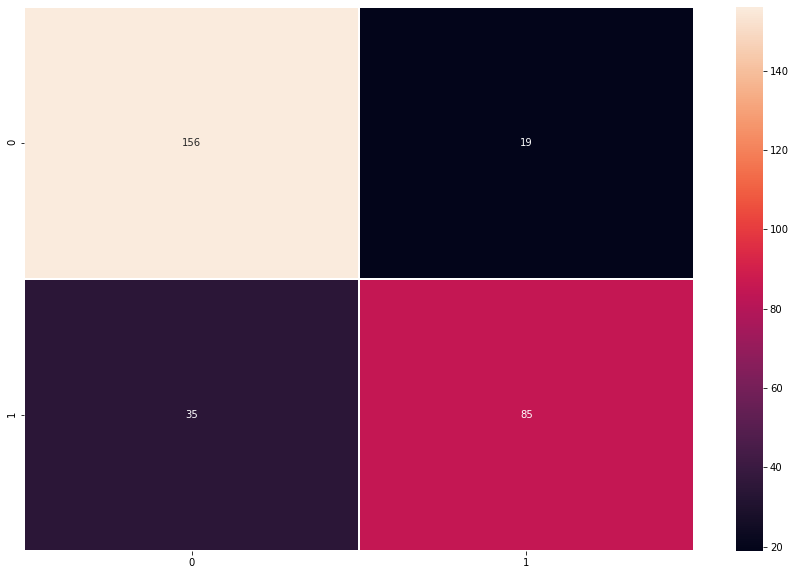

'"\n0\'a 0 demek (DOĞRU SINIFLANDIRMA ) = 156  #bu rakamların yüksek olması modelimizin iyi olduğunu gösterir.\n1\'e 1 demek (DOĞRU SINIFLANDIRMA ) = 85\n\n1\'e 0 demek (FP =YANLIŞ SINIFLANDIRMA) =35 \n0\'a 1 demek(FN= YANLIŞ SINIFLANDIRMA ) =19  #rakamların düşük olması modelimiz için iyi \n'

In [84]:
matrix_confusion(y_test,y_hat_xgboost)

""""
0'a 0 demek (DOĞRU SINIFLANDIRMA ) = 156  #bu rakamların yüksek olması modelimizin iyi olduğunu gösterir.
1'e 1 demek (DOĞRU SINIFLANDIRMA ) = 85

1'e 0 demek (FP =YANLIŞ SINIFLANDIRMA) =35 
0'a 1 demek(FN= YANLIŞ SINIFLANDIRMA ) =19  #rakamların düşük olması modelimiz için iyi 
"""


Kesinlik (Precision) ise Positive olarak tahminlediğimiz değerlerin gerçekten kaç adedinin Positive olduğunu göstermektedir.



Duyarlılık (Recall) ise Positive olarak tahmin etmemiz gereken işlemlerin ne kadarını Positive olarak tahmin ettiğimizi gösteren bir metriktir.


F1 Score değeri bize Kesinlik (Precision) ve Duyarlılık (Recall) değerlerinin harmonik ortalamasını göstermektedir.


Support ise y_test'deki sınıf sayılarının karşılığıdır.






In [85]:
""""
Precision değerimizin 0.826880 gibi yüksek olması Positive anlamında iyi bir sınıflandırma yaptığımız anlamına gelir.

Recall 0.816949	olması gayet kabul edilebilir bir skor.

F1 score ise bizi bu iki değerlerin harmonik ortalamasıdır.

Support ise 1(yaşayanların ) 104 , 0(yaşayamayanları ) 191 olduğunu gösterir.
"""

vis_report_classification(y_hat_xgboost,y_test)

#Yani yukarıdaki tanımlamalara da bakarak şunları söylebiliriz ki :



,precision,recall,f1-score,support
0,0.891429,0.816754,0.852459,191
1,0.708333,0.817308,0.758929,104
accuracy,0.816949,0.816949,0.816949,0
macro avg,0.799881,0.817031,0.805694,295
weighted avg,0.826880,0.816949,0.819486,295


## K - FOLD CROSS VALIDATION 

In [86]:
Accuracy_and_k_cross_val(model_best,x_train,y_train,cv=5) 


#K-Cross Validation cv parametresine göre veri setini böler ve tüm ihtimalleri değerlendirerek bize bir sonuç verir.

#Ayrıca modellerimizin arasında herhangi bir başarı oranında büyük farklar olmadığı için iyi durumda diyebiliriz. Yüksek standart sapmaya sahip değiller. Kabul edilebilir.

Modelin başarısı: 82.22 %
Modeller arasındaki standart sapma 1.51 %
K-Cross-Validation sonuçları: 



array([0.80833333, 0.8487395 , 0.80672269, 0.82352941, 0.82352941])

Random (chance) Prediction: AUROC = 0.500
xg_model_best: AUROC = 0.881


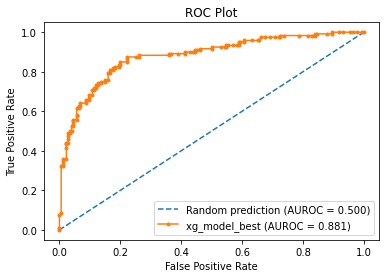

In [87]:
Roc_Curve(model_best,x_test,y_test,"xg_model_best")   


# Modellerimiz ROC plot'unda mükemmel olamasa da iyi bir model olduğunu gösteriyor. 
#NASIL DEĞERLENDİRİLİR : https://miro.medium.com/max/554/1*Lqkajn8HR2jybYNkKsO6Sg.png gibi bir değerlendirme yapılabilir.

#### XGBOOST MODELİMİZ HAKKINDAKİ YORUMLARIMIZ 

In [88]:
"""Modelimiz Kaagle'da şampiyonların şampiyonu olan XGBoost kullandık.

-ARTILARI :

-GridSearch kütüphanesini kullanarak seçtiğimiz parametrelerin hangisinin en iyi kombinasyonlar olduğu gördük
-Normalizasyon(Standart Scaler**etc.) yapmamamıza rağmen %82.22 'lik ortalama başarı elde ettik.
-K-cross validation'da elde ettiğimiz sonuçlar birbirine oldukça yakın olması overfitting konusunda bi nebze içimizi ferahlattı ancak tam emin olmak için GRAFİK ŞART 
-ROC eğrisinde de görüldüğü üzere Normalizasyon yapmamama rağmen %88.1 eğrisine ulaşmak fena olmayan bir sonuç bizim için : daha detaylı bilgiler için https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

EKSİKLERİ : 
-XGBOOST 0-1 değerler aldığı için bizim kendi elimizde girdiğimiz herhangi bir YENİ VERİYİ tahmin edemiyor.
-Bu modelimizden kaynaklanan bir sorun değil diğer tüm modellerde de aynı sorunu yaşacağız belli ki ama 1-0 arasındaki(PREVALENCE) SAYI EŞİTSİZLİĞİ modelin bu konuda elini kolunu bağlıyor.
-ROC eğrisindeki görüldüğü üzere Veri setlerindeki orantısızlık yüzünden modeli daha yukarıya taşıyamıyorum (Prevalance değerine göre yükseltmek istediğiniz / çizilir.)
"""

"Modelimiz Kaagle'da şampiyonların şampiyonu olan XGBoost kullandık.\n\n-ARTILARI :\n\n-GridSearch kütüphanesini kullanarak seçtiğimiz parametrelerin hangisinin en iyi kombinasyonlar olduğu gördük\n-Normalizasyon(Standart Scaler**etc.) yapmamamıza rağmen %82.22 'lik ortalama başarı elde ettik.\n-K-cross validation'da elde ettiğimiz sonuçlar birbirine oldukça yakın olması overfitting konusunda bi nebze içimizi ferahlattı ancak tam emin olmak için GRAFİK ŞART \n-ROC eğrisinde de görüldüğü üzere Normalizasyon yapmamama rağmen %88.1 eğrisine ulaşmak fena olmayan bir sonuç bizim için : daha detaylı bilgiler için https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5\n\nEKSİKLERİ : \n-XGBOOST 0-1 değerler aldığı için bizim kendi elimizde girdiğimiz herhangi bir YENİ VERİYİ tahmin edemiyor.\n-Bu modelimizden kaynaklanan bir sorun değil diğer tüm modellerde de aynı sorunu yaşacağız belli ki ama 1-0 arasındaki(PREVALENCE) SAYI EŞİTSİZLİĞİ modelin bu konuda elini kolunu bağlıyor

### KNN ALGORİTMASI (with Normalization)

Peki XGboost'da normalizasyon yapmadım diyebilirsiniz çünkü en iyi algoritma olarak kabul edilen bir modelin bile normalizasyon yapılmış klasik bir modeldeki başarısını kıyaslamak için yaptım.

In [89]:
from sklearn.neighbors import KNeighborsClassifier




#Mesafesi, bir de kaç komşuya bakacağı bizim için önemli parametrelerdir.

parameters2 = {
        'n_neighbors': [3,5,7,9,11,13,15,],#kaç ayrı kümede inceleyeceği
        'metric': ["euclidean", "minkowski","manhattan"],
        "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=xgboost, param_grid=parameters2, cv = 4, n_jobs = -1, verbose = 0,scoring="accuracy")
knn_cv.fit(x_train, y_train)



knn_best_param = knn_cv.best_params_ #En iyi parametreleri döndürecektir.


knn_BestScore=knn_cv.best_score_ # bu bize en yüksek accuracy döndürecek.

print(f"En iyi skor değerimiz {knn_BestScore}")
print(knn_best_param) #En iyi parametreleri döndürecektir.
#################################################################################





[22:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "algorithm", "metric", "n_neighbors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


En iyi skor değerimiz 0.7802013422818792
{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3}


In [90]:
knn_best=KNeighborsClassifier(algorithm= 'auto', metric= "euclidean", n_neighbors= 3) #best parametrelerle
knn_best.fit(x_train,y_train) # öğrenme işlemi
y_hat_knn=knn_best.predict(x_test) #tahmin etme işlemi

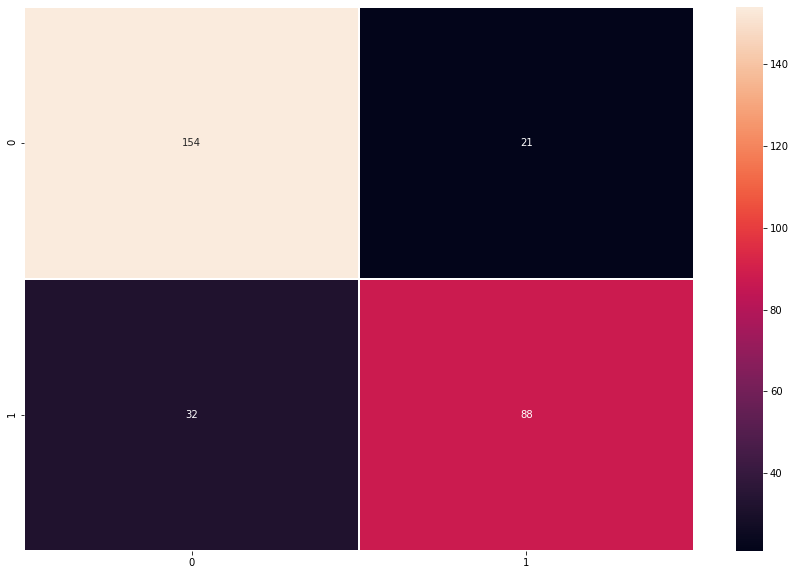

'"\n0\'a 0 demek (DOĞRU SINIFLANDIRMA ) = 154  #bu rakamların yüksek olması modelimizin iyi olduğunu gösterir.\n1\'e 1 demek (DOĞRU SINIFLANDIRMA ) = 88\n\n1\'e 0 demek (FP =YANLIŞ SINIFLANDIRMA) =32 \n0\'a 1 demek(FN= YANLIŞ SINIFLANDIRMA ) =21  #rakamların düşük olması modelimiz için iyi ancak XGBoost kadar iyi değildir.\n'

In [91]:
matrix_confusion(y_test,y_hat_knn)


""""
0'a 0 demek (DOĞRU SINIFLANDIRMA ) = 154  #bu rakamların yüksek olması modelimizin iyi olduğunu gösterir.
1'e 1 demek (DOĞRU SINIFLANDIRMA ) = 88

1'e 0 demek (FP =YANLIŞ SINIFLANDIRMA) =32 
0'a 1 demek(FN= YANLIŞ SINIFLANDIRMA ) =21  #rakamların düşük olması modelimiz için iyi ancak XGBoost kadar iyi değildir.
"""

In [92]:
""""
Precision değerimizin 0.825808 gibi yüksek olması Positive anlamında iyi bir sınıflandırma yaptığımız anlamına gelir.

Recall 0.820339	olması gayet kabul edilebilir bir skor.

F1 score ise bizi bu iki değerlerin harmonik ortalamasıdır.F1 metriği bize sınıflandırma modelimizin gerçek başarısını göstermektedir. ROC eğrisindeki altında kalan alanı da büyütür.

Support ise 1(yaşayanların ) 109 , 0(yaşayamayanları ) 186 veri sayısını olduğunu gösterir."""


vis_report_classification(y_hat_knn,y_test)





,precision,recall,f1-score,support
0,0.880000,0.827957,0.853186,186
1,0.733333,0.807339,0.768559,109
accuracy,0.820339,0.820339,0.820339,0
macro avg,0.806667,0.817648,0.810872,295
weighted avg,0.825808,0.820339,0.821917,295


In [93]:
### XGBOOST modelinin 

Accuracy_and_k_cross_val(knn_best,x_train,y_train,cv=5) 


#K-Cross Validation cv parametresine göre veri setini böler ve tüm ihtimalleri değerlendirerek bize bir sonuç verir.

#Ayrıca modellerimizin arasında herhangi bir başarı oranında büyük farklar olmadığı için iyi durumda diyebiliriz. Yüksek standart sapmaya sahip değiller. Kabul edilebilir.

Modelin başarısı: 77.69 %
Modeller arasındaki standart sapma 1.22 %
K-Cross-Validation sonuçları: 



array([0.76666667, 0.78151261, 0.76470588, 0.77310924, 0.79831933])

Random (chance) Prediction: AUROC = 0.500
knn_best: AUROC = 0.842


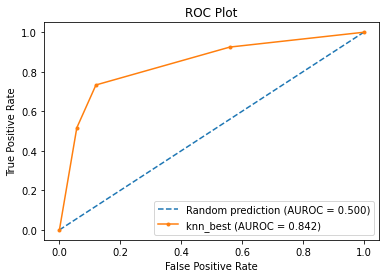

'"\n\nXGBoost kadar iyi olmasa da iyi bir model diyebiliriz. \n\nF1 metriği bize sınıflandırma modelimizin gerçek başarısını göstermektedir. ROC eğrisi de bize F1 değeri arttıkça AUC altında kalan alanın arttığını göstermiştir.\n\n'

In [94]:
Roc_Curve(knn_best,x_test,y_test,"knn_best")  

""""

XGBoost kadar iyi olmasa da iyi bir model diyebiliriz. 

F1 metriği bize sınıflandırma modelimizin gerçek başarısını göstermektedir. ROC eğrisi de bize F1 değeri arttıkça AUC altında kalan alanın arttığını göstermiştir.

"""

KNN modelimizle ilgili Yorumlar: 

In [95]:
""""
ARTILARI : 

-GridSearch kullanılarak en iyi parametrelerin bulunması bizim için en iyi parametrelerin bulunması.
-Yorumlanabilirlik açısından kolay ve oldukça güçlü bir algoritmadır.
-K-Cross-Validationdaki başarı oranları birbirine yakın ve Modelin başarısı: 77.52 % mükemmel değil ancak fena de değildir.

EKSİKLERİ :

-Oluşan Features'ların sayısı kadar bir uzay oluşturup en yakın 5(bunu biz belirliyoruz) komşulara göre değerlendirir.
-Diğer modelimize göre FN-FP sayısı fazla.
-ki XGBoost da belirttiğim gibi , ROC eğrisindeki görüldüğü üzere Veri setlerindeki orantısızlık yüzünden modeli daha yukarıya taşıyamıyorum (Prevalance değerine göre yükseltmek istediğiniz / çizilir.)



"""

'"\nARTILARI : \n\n-GridSearch kullanılarak en iyi parametrelerin bulunması bizim için en iyi parametrelerin bulunması.\n-Yorumlanabilirlik açısından kolay ve oldukça güçlü bir algoritmadır.\n-K-Cross-Validationdaki başarı oranları birbirine yakın ve Modelin başarısı: 77.52 % mükemmel değil ancak fena de değildir.\n\nEKSİKLERİ :\n\n-Oluşan Features\'ların sayısı kadar bir uzay oluşturup en yakın 5(bunu biz belirliyoruz) komşulara göre değerlendirir.\n-Diğer modelimize göre FN-FP sayısı fazla.\n-ki XGBoost da belirttiğim gibi , ROC eğrisindeki görüldüğü üzere Veri setlerindeki orantısızlık yüzünden modeli daha yukarıya taşıyamıyorum (Prevalance değerine göre yükseltmek istediğiniz / çizilir.)\n\n\n\n'

## 3.MODELİMİZ  YAPAY SİNİR AĞLARI 

In [96]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.callbacks import ModelCheckpoint #çünkü modelimiz "validation" iyiye gidiyor onu için.
import tensorflow as tf
from keras.callbacks import EarlyStopping



classifier= Sequential() #bir model oluşturuyoruz.

classifier.add(Dense(8))

# gizli katman
classifier.add(Dense(5,activation="relu")) 


#gizli katman
classifier.add(Dense(5,activation="relu"))


#çıkış katmanı
classifier.add(Dense(1,activation="sigmoid"))  

earlyStopping= EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10) # Modelin belli bir sınır dahilinde (10 epochta accuracy geliştiremezsen) DURDURMA İŞLEMİ ! 


classifier.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])  #derlemiş olucaz bu şekilde.

#neden loss function binary_crossentropy olarak seçtik hep normal de categorical seçilir?
#TARGET KOLON hepsi 0 ila 1 arasında olduğu için, eğer başka şeyler de olsaydı onun için categorical kullanıcaz.




#EarlyStopping'e işin içine kattık çünkü olur da bir ıverfitting durumu ile karşılaşmamak için.



x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20, shuffle= True)


"""MODELİ ÖĞRENME İŞLEMİ """
history_model=classifier.fit(x_train,y_train,epochs=300,batch_size=32,callbacks=[earlyStopping],validation_data=(x_valid,y_valid))


Epoch 1/300
15/15 [==============================] - 1s 18ms/step - loss: 0.6898 - accuracy: 0.6429 - val_loss: 0.6746 - val_accuracy: 0.6833
Epoch 2/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6735 - accuracy: 0.6513 - val_loss: 0.6607 - val_accuracy: 0.6917
Epoch 3/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6572 - accuracy: 0.6576 - val_loss: 0.6447 - val_accuracy: 0.7083
Epoch 4/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6408 - accuracy: 0.6702 - val_loss: 0.6278 - val_accuracy: 0.7083
Epoch 5/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6224 - accuracy: 0.6807 - val_loss: 0.6105 - val_accuracy: 0.7000
Epoch 6/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6045 - accuracy: 0.6954 - val_loss: 0.5910 - val_accuracy: 0.7167
Epoch 7/300
15/15 [==============================] - 0s 5ms/step - loss: 0.5848 - accuracy: 0.7059 - val_loss: 0.5735 - val_accuracy: 0.7333
Epoch 8/300


GÖRSELLEŞTİRME VE GRAFİĞİ FOTOĞRAF OLARAK KAYDETME 

In [98]:
loss_history=history_model.history["loss"] #burada loss'un gidişine bakacağız.
acc_history=history_model.history['accuracy']
epochs=[(i+1) for i in range(29)]

#çizdirme işlemleri..
ax=plt.subplot(211)
ax.plot(epochs,loss_history,color="Red") #hatanın ne kadar düştüğü
ax.set_xlabel('epochs') #x label'in adı
ax.set_ylabel('Error Rate Epoch') 



#ikinci şekil

ax2=plt.subplot(212)
ax2.plot(epochs,acc_history,color="Blue") # ax2'de olacakları seçme ve 
ax2.set_xlabel('epochs') #x label'in adı
ax2.set_ylabel('Accuracy per  Epoch')


plt.subplots_adjust(hspace=0.8) #boşlukları belirme
plt.savefig("Accuracy_loss.png") #sonucu kaydetme işlemi
plt.close()

#### FOTOĞRAFLARIMIZ DOSYA İÇİNE KAYDETMESİ LAZIM.


loss_history=history_model.history["val_loss"] #burada loss'un gidişine bakacağız.
acc_history=history_model.history['val_accuracy']
epochs=[(i+1) for i in range(29)]

#çizdirme işlemleri..
ax=plt.subplot(211)
ax.plot(epochs,loss_history,color="Red") #hatanın ne kadar düştüğü
ax.set_xlabel('epochs') #x label'in adı
ax.set_ylabel('Error Rate Epoch') 



#ikinci şekil

ax2=plt.subplot(212)
ax2.plot(epochs,acc_history,color="Blue") # ax2'de olacakları seçme ve 
ax2.set_xlabel('epochs') #x label'in adı
ax2.set_ylabel('Accuracy per  Epoch')


plt.subplots_adjust(hspace=0.8) #boşlukları belirme
plt.savefig("val_Accuracy_loss.png") #sonucu kaydetme işlemi
plt.close()

In [99]:
y_hat_ann=(classifier.predict(x_test) > 0.5)*1  # 0.5 altındaki değerleri 1 olarak diğerlerine de 0 olarak alacağız.

#*1 ve int değerine çevirdiğimiz için True False olarak değil , 0 ve 1 olarak ekrana verecektir.

10/10 [==============================] - 0s 2ms/step


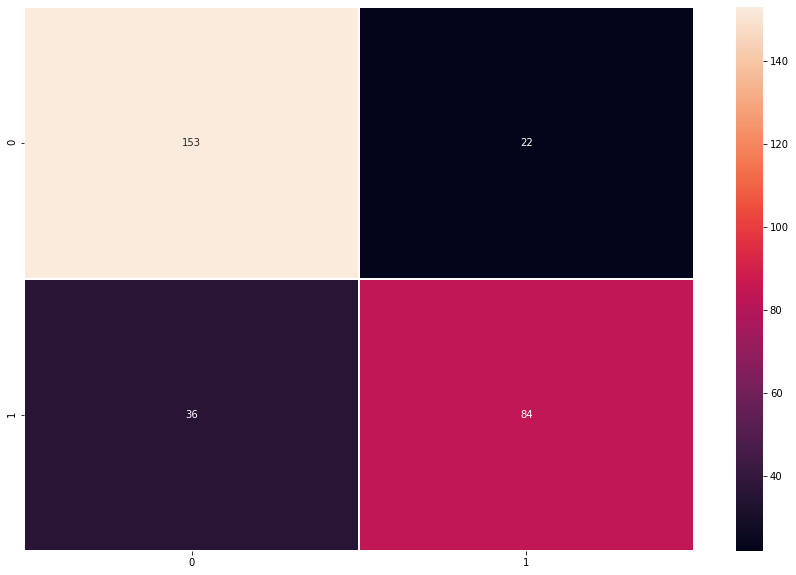

In [100]:

""""
0'a 0 demek (DOĞRU SINIFLANDIRMA ) = 153  #bu rakamların yüksek olması modelimizin iyi olduğunu gösterir.
1'e 1 demek (DOĞRU SINIFLANDIRMA ) = 80

1'e 0 demek (FP =YANLIŞ SINIFLANDIRMA) =40 
0'a 1 demek(FN= YANLIŞ SINIFLANDIRMA ) =22  #rakamların düşük olması modelimiz için iyi ancak  


"""

matrix_confusion(y_test,y_hat_ann)



In [101]:

""""
Precision değerimizin 0.811661 gibi yüksek olması Positive anlamında iyi bir sınıflandırma yaptığımız anlamına gelir.AMA 1 olanları 0.691667 gibi precision değeri var bu support değeri bağlı herhalde.

Recall 0.803390	olması gayet kabul edilebilir bir skor.

F1 score ise bizi bu iki değerlerin harmonik ortalamasıdır.F1 metriği bize sınıflandırma modelimizin gerçek başarısını göstermektedir. 

Support ise 1(yaşayanların ) 101 , 0(yaşayamayanları ) 194 veri sayısını olduğunu gösterir."""




vis_report_classification(y_hat_ann,y_test)


,precision,recall,f1-score,support
0,0.874286,0.809524,0.840659,189
1,0.700000,0.792453,0.743363,106
accuracy,0.803390,0.803390,0.803390,0
macro avg,0.787143,0.800988,0.792011,295
weighted avg,0.811661,0.803390,0.805699,295


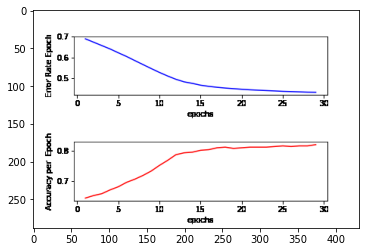

In [103]:
import cv2

resim=cv2.imread("Accuracy_loss.png")
plt.imshow(resim)



#Resimde de görüldüğü üzere epoch sayım arttıkça Error Rate azalırken, accuracy (başarı) artmış ve bunda herhangi bir keskin iniş yok.
#Bu da overfitting korkumuzu bi nebze'de olsa azaltıyor. Ama kesin sonuç için test verilerinin validation'ı da lazım bize.

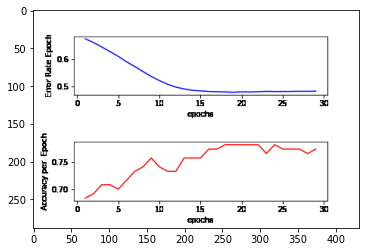

In [104]:
resim=cv2.imread("val_Accuracy_loss.png")
plt.imshow(resim)

In [ ]:
""""
ANN MODELİNİN ;

ARTILARI :
- loss: 0.3431 - accuracy: 0.8624 olması bizim için oldukça sevindirici bir durum, Diğer modellerimizden daha yüksek çıktı.
-Kendi kendine öğrenen bir model geliştirdik
-Overfitting'in önüne geçmek için EarlyStopping kullandık aslında.Bu en yüksek başarıyı elde etmemizi sağladı.
-Validasyon setiyle eğittik.

EKSİKLERİ:
k-cross Validation kullanamadık. Nasıl bir test verisiyle ayrıldığını bilmiyoruz.
Test verilerini karşılaştırmadık.
""""

That's it.